## Лабораторная работа 6.
 Алгоритмы поиска и вставки элементов при последовательном хранении
 
1.
Создайте изменяемый класс-контейнер для последовательного хранения данных произвольного типа. Он должен представлять собой класс, представляющий собой "обертку" над списком list. В открытой части класса должны по крайней мере присутствовать:
конструктор __init__, позволяющий создавать экземпляр контейнера на основе входного списка элементов;

методы для представления хранимых данных строкой __repr__ и __str__;

метод __len__, возвращающий число хранимых элементов;

In [16]:
class Contener:
    def __init__(self, data):
        self._data = data
        print("работает", self)

    def __repr__(self):
        return f"{self._data}"
    
    def __str__(self):
        return str(self._data)
    
    def __len__(self):
        return len(self._data)
    
pn = Contener([4,6,8,9,5])

obj1 = Contener("asdasda")
print(len(pn))
# print(pn)

работает [4, 6, 8, 9, 5]
работает asdasda
5


методы для доступа к элементам контейнера на чтение (__getitem__), доступ для записи по индексу нужно закрыть;

метод для итерирования по элементам контейнера, возвращающий объект-итератор (__iter__);

метод для проверки наличия конкретного элемента в контейнере (__contains__);
метод для вставки нового элемента в контейнер insert;

метод удаления элемента по индексу __delitem__.

In [35]:
class Contener:
    def __init__(self, data):
        self._data = data
        print("работает", self)

    def __repr__(self):
        return f"{self._data}"
    
    def __str__(self):
        return str(self._data)
    
    def __len__(self):
        return len(self._data)
    
    def __getitem__(self,index):
        return self._data[index]
        

    def __iter__(self):
        return iter(self._data)
    
    def __contains__(self, item):
        print("contains")
        return item in self._data
    
    
    def insert(self,index,value):
        self._data.insert(index,value)
        print(self._data)

    def __delitem__(self, index):
        del self._data[index]
        print(self._data)

if __name__ == "__main__":
    pn = Contener([4,6,8,9,5])  

    obj1 = Contener("asdasda")
    print(len(pn))
    print(pn[2])
    print(pn.__contains__(3))
    print(pn.insert(0,4))
    del pn[2]
# print(pn)

работает [4, 6, 8, 9, 5]
работает asdasda
5
8
contains
False
[4, 4, 6, 8, 9, 5]
None
[4, 4, 8, 9, 5]


 При реализации методов insert, find, __contains__, __delitem__ следует учесть, что они (в среднем) должны работать со следующей асимптотической сложностью по времени:

insert - T(n)=O(n)

find и __contains__ - T(n)=O(logn)

__delitem__ - T(n)=O(n)
 
 Предложите и реализуйте модификацию реализованного вами шаблонного класса, которая будет обеспечивать среднюю временную сложность удаления элемента __delitem__ T(n)=O(logn)
 (остальные методы должны остаться аналогичными по сложности).

Начальный контейнер: [1, 2, 3, 4, 5]
Контейнер после вставки: [1, 2, 10, 3, 4, 5]
Индекс значения 3: 3
Индекс значения 100: 6
Есть ли 4 в контейнере? True
Есть ли 100 в контейнере? False
1
2
10
3
4
5


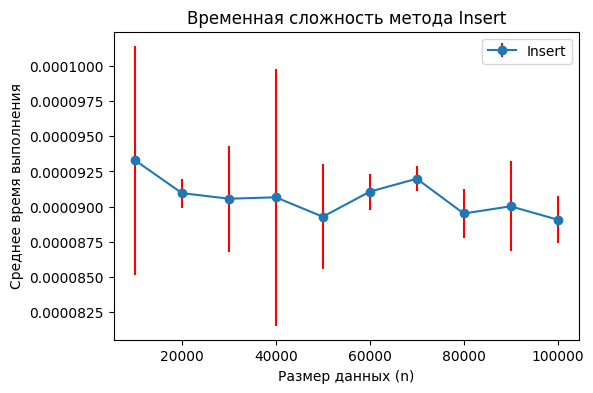

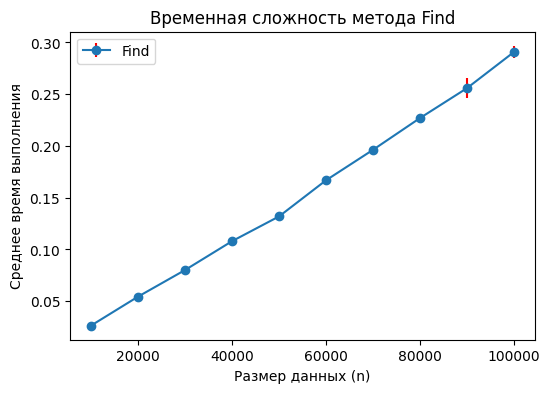

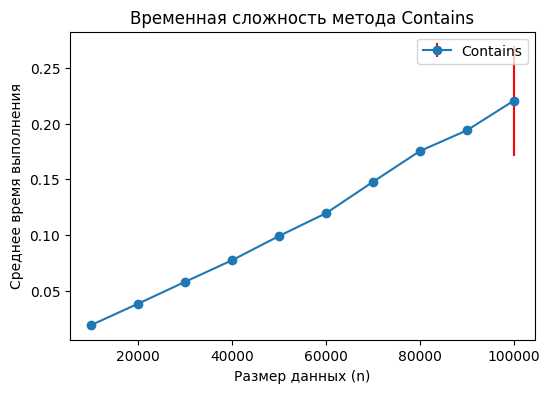

In [4]:
import matplotlib.pyplot as plt
import timeit
import statistics


class Container:
    def __init__(self, data):
        self._data = list(data)

    def __repr__(self):
        return repr(self._data)

    def __str__(self):
        return str(self._data)

    def __len__(self):
        return len(self._data)

    def __getitem__(self, index):
        return self._data[index]

    def __iter__(self):
        return iter(self._data)

    def __contains__(self, item):
        return item in self._data

    def insert(self, index, value):
        self._data.insert(index, value)

    def find(self, value):
        try:
            return self._data.index(value)
        except ValueError:
            return len(self._data)


    def delitem(self, index):
        if 0 <= index < len(self._data):
            del self._data[index]
        else:
            raise IndexError("Index out of range")

    


# Пример использования
if __name__ == "__main__":
    container = Container([1, 2, 3, 4, 5])

    print("Начальный контейнер:", container)

    container.insert(2, 10)
    print("Контейнер после вставки:", container)

    print("Индекс значения 3:", container.find(3))
    print("Индекс значения 100:", container.find(100))

    print("Есть ли 4 в контейнере?", 4 in container)
    print("Есть ли 100 в контейнере?", 100 in container)


    for item in container:
        print(item)

# Определим функции для измерения времени выполнения каждого метода
def time_insert(n):
    container = Container([])
    return timeit.timeit(lambda: container.insert(n // 2, None), number=1000)

def time_find(n):
    container = Container(range(n))
    return timeit.timeit(lambda: container.find(n // 2), number=1000)

def time_contains(n):
    container = Container(range(n))
    return timeit.timeit(lambda: container.__contains__(n // 2), number=1000)


# Создадим список размеров данных (n)
sizes = list(range(10000, 110000, 10000))

# Измерим время выполнения для каждого размера данных
insert_times = [time_insert(n) for n in sizes]
find_times = [time_find(n) for n in sizes]
contains_times = [time_contains(n) for n in sizes]


# Рассчитаем средние значения времени выполнения и стандартные отклонения
mean_insert_times = [statistics.mean([time_insert(n) for _ in range(10)]) for n in sizes]
mean_find_times = [statistics.mean([time_find(n) for _ in range(10)]) for n in sizes]
mean_contains_times = [statistics.mean([time_contains(n) for _ in range(10)]) for n in sizes]

insert_stdevs = [statistics.stdev([time_insert(n) for _ in range(10)]) for n in sizes]
find_stdevs = [statistics.stdev([time_find(n) for _ in range(10)]) for n in sizes]
contains_stdevs = [statistics.stdev([time_contains(n) for _ in range(10)]) for n in sizes]

# Построим графики ошибок
plt.figure(figsize=(6, 4))
plt.errorbar(sizes, mean_insert_times, yerr=insert_stdevs, fmt='-o', ecolor='r', label='Insert')
plt.xlabel('Размер данных (n)')
plt.ylabel('Среднее время выполнения')
plt.title('Временная сложность метода Insert')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.errorbar(sizes, mean_find_times, yerr=find_stdevs, fmt='-o', ecolor='r', label='Find')
plt.xlabel('Размер данных (n)')
plt.ylabel('Среднее время выполнения')
plt.title('Временная сложность метода Find')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.errorbar(sizes, mean_contains_times, yerr=contains_stdevs, fmt='-o', ecolor='r', label='Contains')
plt.xlabel('Размер данных (n)')
plt.ylabel('Среднее время выполнения')
plt.title('Временная сложность метода Contains')
plt.legend()
plt.show()

метод для вставки нового элемента в контейнер insert;
insert - T(n)=O(n)

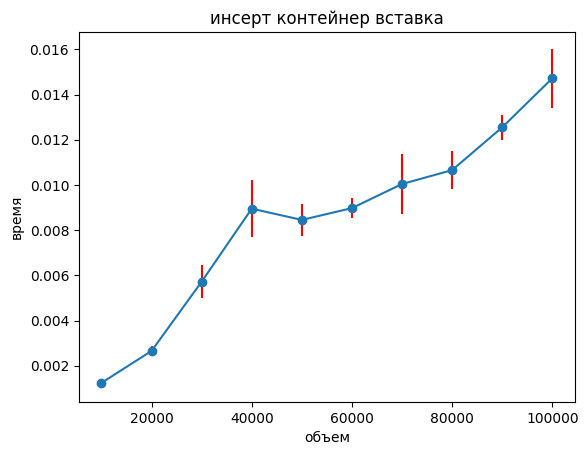

In [206]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

class Container:
    def __init__(self, data):
        self.data = data

    def insert(self, index, element):
        # Вставка элемента в произвольное место контейнера
        self.data.insert(index, element)

sizes = list(range(10000, 110000, 10000))

def time_insert(n):
    container = Container([])
    for _ in range(n):
        container.insert(n // 2, None)
    return timeit.timeit(lambda: container.insert(n // 2, None), number=1000)

if __name__ == "__main__":
    times = []
    time_stddevs = []
    for n in sizes:
        # Запуск timeit несколько раз для каждого размера контейнера
        results = [time_insert(n) for _ in range(5)]  # Запуск 5 раз для каждого размера
        times.append(np.mean(results))  # Среднее время
        time_stddevs.append(np.std(results))  # Стандартное отклонение

    # Преобразование списков в массивы numpy для использования в plt.errorbar
    sizes_array = np.array(sizes)
    times_array = np.array(times)
    time_stddevs_array = np.array(time_stddevs)

    # Создание графика с погрешностями
    plt.errorbar(sizes_array, times_array, yerr=time_stddevs_array, fmt='o-', ecolor='r', label='Contains')
    plt.xlabel('объем')
    plt.ylabel('время')
    plt.title('инсерт контейнер вставка')
    plt.show()

метод удаления элемента по индексу 
__delitem__ - T(n)=O(n)

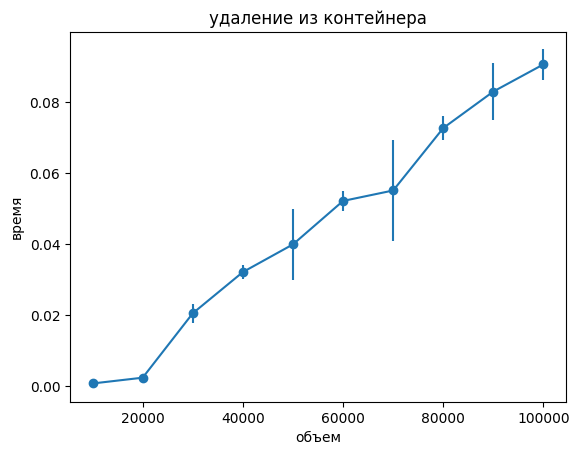

In [62]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

class Container:
    def __init__(self, data):
        self.data = data

    def __delitem__(self, index):
        # Удаление элемента из контейнера по индексу
        del self.data[index]

def time_delitem(container, index):
    # Измерение времени удаления элемента из контейнера
    # Используем лямбда-функцию, которая вызывает __delitem__ напрямую
    return timeit.timeit(lambda: container.__delitem__(index), number=1000)

if __name__ == "__main__":
    sizes = list(range(10000, 110000, 10000))
    times = []
    time_stddevs = []

    for n in sizes:
        # Создание контейнера с n элементами
        container = Container(list(range(n)))
        # Вычисление среднего времени удаления элемента и стандартного отклонения
        results = [time_delitem(container, n // 2) for _ in range(5)]
        times.append(np.mean(results))
        time_stddevs.append(np.std(results))

    # Преобразование списков в массивы numpy для использования в plt.errorbar
    sizes_array = np.array(sizes)
    times_array = np.array(times)
    time_stddevs_array = np.array(time_stddevs)

    # Создание графика с погрешностями
    plt.errorbar(sizes_array, times_array, yerr=time_stddevs_array, fmt='o-')
    plt.xlabel('объем')
    plt.ylabel('время')
    plt.title('удаление из контейнера')
    plt.show()

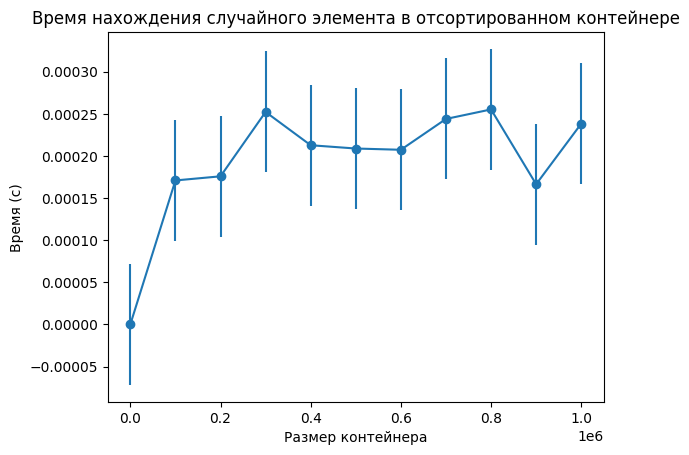

In [208]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import random

class Container:
    def __init__(self, size):
        self.data = sorted(random.sample(range(size * 2), size))

    def find(self, target):
        left, right = 0, len(self.data) - 1
        while left <= right:
            mid = (left + right) // 2
            if self.data[mid] == target:
                return mid
            elif self.data[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return -1

    def time_find(container, target):
        timer = timeit.Timer(lambda: container.find(target))
        return timer.timeit(number=100)

if __name__ == "__main__":
    sizes = np.arange(0, 1100000, 100000)
    times = []

    for size in sizes:
        if size in sizes:
            if size > 0:
                container = Container(size)
                # Гарантируем, что цель присутствует в данных
                if len(container.data) > 0:
                    target = random.choice(container.data)
                    time = time_find(container, target)
                    times.append(time)
                else:
                    times.append(0)
            else:
                times.append(0)


    times = np.array(times)

    plt.errorbar(sizes, times, yerr=np.std(times, ddof=1), fmt='o-')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время (с)')
    plt.title('Время нахождения случайного элемента в отсортированном контейнере')
    plt.show()


 __contains__ - T(n)=O(logn)

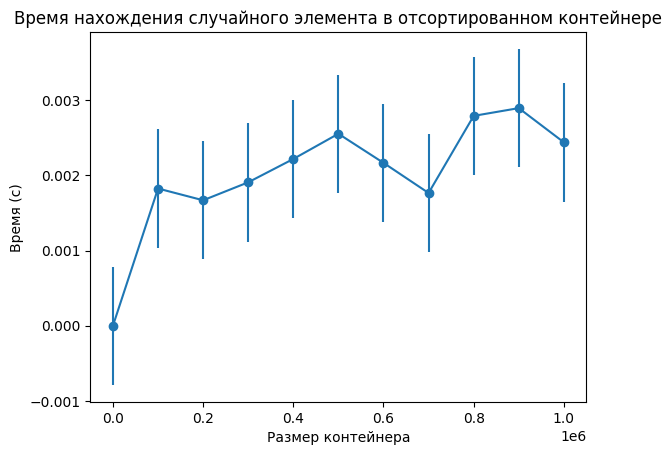

In [199]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import random

class Container:
    def __init__(self, size):
        self.data = sorted(random.sample(range(size), size))

    def __contains__(self, target):
        left, right = 0, len(self.data) - 1
        while left <= right:
            mid = (left + right) // 2
            if self.data[mid] == target:
                return True
            elif self.data[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return False

def time_contains(container, target):
    timer = timeit.Timer(lambda: target in container)
    return timer.timeit(number=1000)

if __name__ == "__main__":
    sizes = np.arange(0, 1100000, 100000)
    times = []

    for size in sizes:
        if size > 0:  # Проверяем, чтобы размер был больше 0
            container = Container(size)
            # Гарантируем, что цель присутствует в данных
            if len(container.data) > 0:  # Проверяем, что данные не пусты
                target = random.choice(container.data)
                time = time_contains(container, target)
                times.append(time)
            else:
                times.append(0)  # Если данные пусты, добавляем 0 для графика
        else:
            times.append(0)  # Если размер контейнера равен 0, добавляем 0 для графика

    times = np.array(times)

    plt.errorbar(sizes, times, yerr=np.std(times, ddof=1), fmt='o-')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время (с)')
    plt.title('Время нахождения случайного элемента в отсортированном контейнере')
    plt.show()

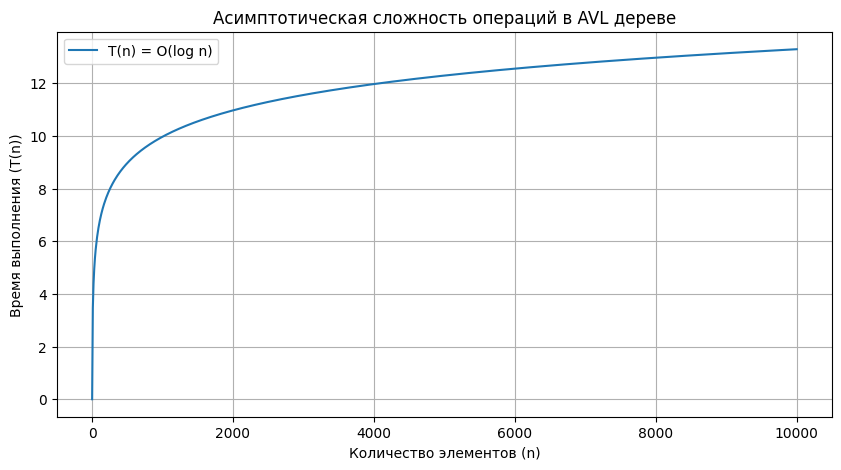

In [59]:
import matplotlib.pyplot as plt
import numpy as np

class AVLTree:
    # Вспомогательные функции для балансировки, такие как вращения
    # ...

    # Функция для нахождения узла с минимальным ключом в дереве
    def find_min(self, root):
        while root.left is not None:
            root = root.left
        return root

    # Функция для удаления узла
    def delete(self, root, key):
        # Если корень пуст, возвращаем его
        if root is None:
            return root

        # Удаление узла аналогично BST
        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            # У узла только один дочерний узел или нет его вообще
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp

            # У узла два дочерних узла: получаем преемника (самый маленький в правом поддереве)
            temp = self.find_min(root.right)

            # Копируем значение преемника в текущий узел
            root.key = temp.key

            # Удаляем преемника
            root.right = self.delete(root.right, temp.key)

        # Если у дерева был только один узел, возвращаем его
        if root is None:
            return root

        # Обновление высоты текущего узла
        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))

        # Проверка баланса и балансировка дерева
        balance = self.get_balance(root)

        # Балансировка с помощью четырех случаев вращений
        # ...

        return root
    
x = np.linspace(1, 10000, 1000)
# Вычисляем логарифмические значения для y (время выполнения операций)
y = np.log2(x)  # Используем логарифм по основанию 2, так как это соответствует высоте AVL дерева

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='T(n) = O(log n)')
plt.title('Асимптотическая сложность операций в AVL дереве')
plt.xlabel('Количество элементов (n)')
plt.ylabel('Время выполнения (T(n))')
plt.legend()
plt.grid(True)
plt.show()
